In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, confusion_matrix, plot_confusion_matrix
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import scikitplot as skplt

In [2]:
df = pd.read_csv('./healthcare-dataset-stroke-data.csv')

In [3]:
df_dum = pd.get_dummies(df.drop(columns=['id']), columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 
                                     'work_type', 'Residence_type', 'smoking_status'])

X = df_dum.drop('stroke', axis=1)
y = df_dum.stroke.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=df_dum.stroke.values)

In [4]:
imp = SimpleImputer(missing_values=np.nan, strategy="mean")
X_train["bmi"] = imp.fit_transform(X_train[["bmi"]]).ravel()

/Users/koraykarakas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
# Gaussian Naive Bayes Model

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [6]:
X_test["bmi"] = imp.transform(X_test[["bmi"]]).ravel()

/Users/koraykarakas/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
y_pred = gnb.predict(X_test)

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.44      0.61      1216
           1       0.08      0.90      0.14        62

    accuracy                           0.47      1278
   macro avg       0.53      0.67      0.38      1278
weighted avg       0.94      0.47      0.59      1278



In [9]:
print(classification_report(y_train, gnb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60      3645
           1       0.08      0.94      0.14       187

    accuracy                           0.46      3832
   macro avg       0.54      0.69      0.37      3832
weighted avg       0.95      0.46      0.58      3832



In [10]:
print('test set', accuracy_score(y_test, y_pred))
print('train set', accuracy_score(y_train, gnb.predict(X_train)))

test set 0.46557120500782473
train set 0.45772442588726514


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

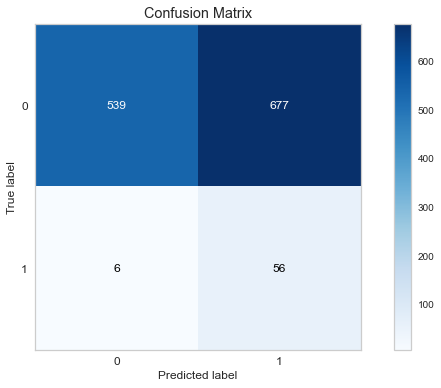

In [11]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(12, 6))

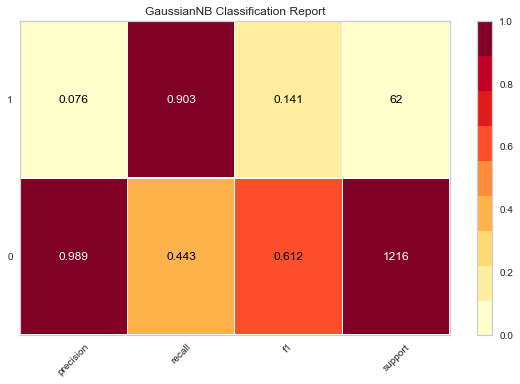

<AxesSubplot:title={'center':'GaussianNB Classification Report'}>

In [12]:
visualizer = ClassificationReport(gnb, support=True)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()